# Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task.

It performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output) using the formula **y = m(x) + c**. Hence, the name is Linear Regression.

## Boston Dataset
---

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,median_absolute_error as mee,r2_score as r2,mean_squared_error as mse

### Loading Dataset

In [2]:
from sklearn import datasets 
bos = datasets.load_boston()

In [3]:
print(bos)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

### Data Preprocessing

In [4]:
x=bos.data
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
y=bos.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
bos.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


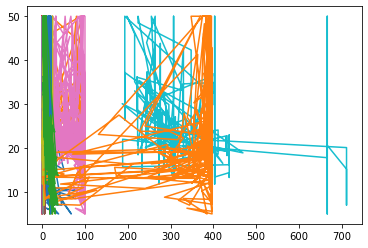

In [8]:
plt.plot(x,y)
plt.show()

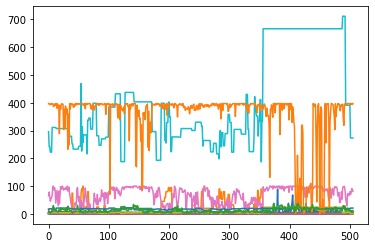

In [9]:
plt.plot(x)
plt.show()

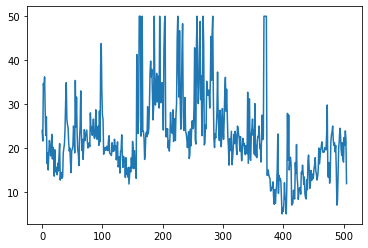

In [10]:
plt.plot(y)
plt.show()

### Splitting into Train and Test dataset

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

### Data Scaling

In [12]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
print(st_x)

StandardScaler()


In [13]:
x_train= st_x.fit_transform(x_train) 
print(x_train)

[[-0.42054453  0.41117689 -0.84923313 ... -0.81846496  0.44047695
   0.05497058]
 [ 1.05813    -0.47409775  0.94239807 ...  0.77079638 -2.32930526
   0.03795721]
 [-0.25278198 -0.47409775 -0.48975657 ...  1.14474022 -1.10359222
   1.03182129]
 ...
 [-0.16849289 -0.47409775  0.94239807 ...  0.77079638  0.18010861
   0.03937499]
 [-0.41170669 -0.47409775  2.02801729 ...  0.25662359  0.3299541
   0.24778871]
 [-0.34647689  0.36902095 -1.08936348 ... -2.59469822  0.40734107
  -0.37036355]]


In [14]:
x_test= st_x.transform(x_test)  
print(x_test)

[[-0.42428043  0.91704811 -1.3467487  ... -0.07057727  0.41740766
  -0.58586618]
 [-0.42790407  2.05525837 -1.23890573 ... -1.37938073  0.41751252
  -1.13880054]
 [-0.42636633  2.89837708 -1.17563785 ... -1.14566583  0.45452824
  -1.18984064]
 ...
 [-0.41621972 -0.47409775 -0.4293645  ...  1.09799724  0.43712142
  -0.11232751]
 [-0.41898478  0.79058031 -0.95132447 ... -0.91195092  0.20129041
  -0.26119446]
 [-0.40513088 -0.47409775 -0.4293645  ...  1.09799724 -2.96496891
  -0.3448435 ]]


### Creating a Linear Regression Model

In [15]:
model = linear_model.LinearRegression()

### Training Model

In [16]:
model.fit(x_train,y_train)

LinearRegression()

### Predecting Target using Model

In [17]:
y_pre=model.predict(x_test)
y_pre

array([31.0789639 , 31.721694  , 30.87314928, 22.28234976, 18.85606115,
       16.47132499, 36.05004157, 14.64032337, 25.24078574, 36.92073901,
       21.24395893, 31.05887245, 27.83837442, 33.90940352, 33.94484713,
       40.02040311, 24.14373978, 23.32713796, 25.34120561, 21.49039367,
       32.84083784, 17.72022746, 25.36791791, 24.95097385, 32.39265827,
       20.42497001, 19.33257493, 16.97042135, 38.61885431,  0.99817403,
       32.18145419, 32.02985417, 26.01208772, 23.68917386, 20.38030786,
       19.45806916,  3.46147073, 34.9034939 , 26.98281534, 27.54218642,
       33.89021463, 29.7542196 , 18.15540973, 31.44609872, 17.82446519,
       28.30204573, 19.31527567, 21.90113613, 37.88043957, 16.3464837 ,
       24.68739442, 19.29872222, 24.46627252, 33.91063878, 26.63876989,
       34.33425076, 20.88039511, 19.69421544, 18.70556587, 24.73298651,
       19.89555718, 23.36114411, 39.77392395, 42.09981475, 30.12796703,
       16.7250859 , 23.89207337,  3.48737625, 31.5042913 , 28.36

### Performance Analysis of the Model

In [18]:
print("Training Score : ", model.score(x_train,y_train)*100)

Training Score :  75.0121534530608


In [19]:
print("Testing Score : ", model.score(x_test,y_test)*100)

Testing Score :  67.09339839115636


In [20]:
print("Mean Absolute Error : ", mae(y_test,y_pre)*100)

Mean Absolute Error :  406.14191829547053


In [21]:
print("Median Absolute Error : ", mee(y_test,y_pre)*100)

Median Absolute Error :  266.6780635339144


In [22]:
print("Root Mean Squared Error : ", mse(y_test,y_pre)*100)

Root Mean Squared Error :  3441.3968453138496


In [23]:
print(" R Squared Score: ", r2(y_test,y_pre)*100)

 R Squared Score:  67.09339839115636


In [24]:
print("Coefficient Of X : ",model.coef_.sum())
print("Intercept : ",model.intercept_)

Coefficient Of X :  -5.891163440634312
Intercept :  21.84183168316834


In [25]:
print(y_test)

[28.4 31.1 23.5 26.6 19.6 14.3 50.  14.3 20.7 37.6 20.4 27.5 36.2 32.
 33.1 48.8 24.6 26.4 23.2 17.  41.3 14.9 18.5 25.  36.4 19.5 27.1 14.9
 46.  17.9 30.3 31.6 23.1 24.7 16.7 18.3  8.4 37.3 22.1 22.  46.7 30.1
 12.1 29.1 16.6 23.9 19.9 21.4 45.4 15.6 22.7 12.5 24.3 43.8 22.  33.8
 19.3 22.6 16.1 15.  19.6 21.2 50.  50.  29.4 17.8 22.8  8.8 32.5 42.8
 12.6 28.6 19.1 50.  27.5 23.7 50.   7.2 18.7 37.  22.9 22.9 17.1 22.
 23.6 23.9 27.1 29.  22.2  7.  20.7 18.5 21.6 23.  16.  15.  23.9 24.4
 22.6 19.8 22.2 18.6]


In [26]:
print(y_pre)

[31.0789639  31.721694   30.87314928 22.28234976 18.85606115 16.47132499
 36.05004157 14.64032337 25.24078574 36.92073901 21.24395893 31.05887245
 27.83837442 33.90940352 33.94484713 40.02040311 24.14373978 23.32713796
 25.34120561 21.49039367 32.84083784 17.72022746 25.36791791 24.95097385
 32.39265827 20.42497001 19.33257493 16.97042135 38.61885431  0.99817403
 32.18145419 32.02985417 26.01208772 23.68917386 20.38030786 19.45806916
  3.46147073 34.9034939  26.98281534 27.54218642 33.89021463 29.7542196
 18.15540973 31.44609872 17.82446519 28.30204573 19.31527567 21.90113613
 37.88043957 16.3464837  24.68739442 19.29872222 24.46627252 33.91063878
 26.63876989 34.33425076 20.88039511 19.69421544 18.70556587 24.73298651
 19.89555718 23.36114411 39.77392395 42.09981475 30.12796703 16.7250859
 23.89207337  3.48737625 31.5042913  28.36556798 18.38104887 27.21050071
 19.67650851 25.97427363 24.84540263  9.52991888 38.51706797  8.02841411
 18.59655852 30.16501403 22.83387325 21.07185799 19.9

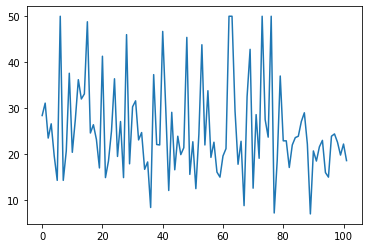

In [27]:
plt.plot(y_test)

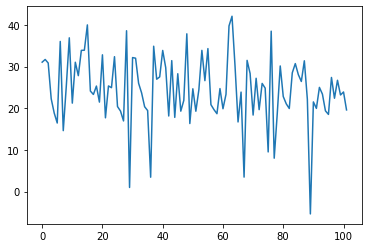

In [28]:
plt.plot(y_pre)

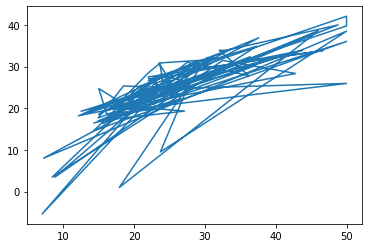

In [29]:
plt.plot(y_test,y_pre)

The Linear Regression Model's accuracy is 67%  Calculated by R squared score. Hence it is a **Good** Model.